# Desarrollo de un Modelo Predictivo para Estimar Tiempos de Entrega en Pedidos

**Objetivo General:**
Desarrollar un modelo predictivo para estimar el tiempo total (total_minutes) que tomará completar un pedido, basándose en datos históricos de órdenes, información de productos, detalles de los shoppers, y características de las sucursales de las tiendas.

**Objetivos Específicos:**
1. **Preparación de Datos:**
   - Realizar una limpieza y transformación efectiva de los conjuntos de datos relacionados con órdenes, productos, shoppers y sucursales de tiendas para garantizar la consistencia y relevancia de las variables.


2. **División de Datos:**
   - Separar el conjunto de datos en conjuntos de entrenamiento, validación y prueba para permitir una evaluación efectiva del rendimiento del modelo.

3. **Selección y Entrenamiento de Modelos:**
   - Evaluar y entrenar múltiples modelos predictivos, incluyendo Random Forest, KNN, Gradient Boosting, Linear SVC, Decision Tree, XGBoost y LightGBM, para identificar el modelo con el mejor rendimiento en términos de RMSE en el conjunto de validación.
   - Ajustar los hiperparámetros de los modelos para mejorar su capacidad predictiva.

4. **Predicción de 'total_minutes':**
   - Utilizar el modelo identificado como el mejor, basado en el conjunto de validación, para predecir los valores de 'total_minutes' en el conjunto de datos de pedidos, y generar el archivo de "orders.csv" con las predicciones de los valores nulos.


## Descripción de Conjuntos de Datos Relacionados con el pedido.

Para el desarrollo de este trabajo se entrego una serie de archivos CSV ,A continuación, se presenta una breve descripción de cada conjunto de datos::

* order_products.csv: Contiene detalles sobre los productos asociados a cada pedido, incluyendo la cantidad, unidad de compra, y otros atributos clave.

* orders.csv: Proporciona información detallada sobre los pedidos, como la ubicación de entrega, tiempo de entrega prometido, la identificación del shopper, la sucursal de la tienda, y el tiempo total que tomó completar el pedido.

* shoppers.csv: Ofrece datos sobre los shoppers, incluyendo su antigüedad, tasas de éxito en la búsqueda de productos, velocidad de picking, tasas de aceptación de pedidos, y calificaciones de los clientes.

* storebranch.csv: Contiene detalles sobre las sucursales de las tiendas, como la ubicación geográfica y la identificación de la tienda.

Detalle de las Variables:

1. **order_products.csv**:
    - `order_id`: ID del pedido.
    - `product_id`: ID del producto.
    - `cantidad`: La cantidad pedida de este producto.
    - `buy_unit`: La unidad del producto (KG/UN).

2. **orders.csv**:
    - `order_id`: ID del pedido.
    - `lat`: La latitud del lugar de entrega.
    - `lng`: La longitud de la ubicación de entrega.
    - `prometido_tiempo`: El tiempo de entrega prometido al usuario.
    - `on_demand`: Si es verdadero, se prometió que el pedido se entregaría en menos de X minutos.
    - `shopper_id`: ID que representa al shopper que completó el pedido.
    - `store_branch_id`: ID de la sucursal de la tienda.
    - `total_minutes`: El total de minutos que tomó completar el pedido (etiqueta).

3. **shoppers.csv**:
    - `shopper_id`: ID del comprador.
    - `antigüedad`: El nivel de experiencia del comprador.
    - `tasa_encontrada`: Porcentaje de productos encontrados por histórico de compradores.
    - `picking_speed`: Histórico de velocidad de picking, productos por minutos.
    - `tasa_aceptada`: Porcentaje de pedidos históricamente aceptados por el comprador.
    - `calificación`: Calificación del cliente del comprador.

4. **storebranch.csv**:
    - `store_branch_id`: ID de la sucursal de la tienda.
    - `tienda`: ID que representa la tienda.
    - `lat`: Latitud de la ubicación de la sucursal.
    - `lng`: Longitud de la ubicación de la sucursal.



## Lectura de Archivos CSV para Análisis de Datos con Python y Pandas



In [ ]:
import pandas as pd

# Ruta de la carpeta que contiene los archivos CSV
carpeta = '/content/drive/MyDrive/Colab Notebooks/ML/Trabajo final/data/'

# Leer los archivos CSV
pedir_productos = pd.read_csv(carpeta + 'order_products.csv')
pedidos = pd.read_csv(carpeta + 'orders.csv')
comprador = pd.read_csv(carpeta + 'shoppers.csv')
sucursal = pd.read_csv(carpeta + 'storebranch.csv')


## Registro de productos solicitados

Contiene detalles sobre los productos asociados a cada pedido, incluyendo la cantidad, unidad de compra, y otros atributos clave.

In [ ]:
pedir_productos

,order_id,product_id,quantity,buy_unit
0,47099653730fb1b76537fc10ad876255,c1244453d731c77416cb4766e3bd76cb,1.0,UN
1,689d8866915acf87e851c2591a23a82f,43cc2b100bec640fe563cd16f2db669f,1.0,KG
2,f26d16bf6f38c9e31d0be877f4013a9e,b8f880759d014134e272d881d49989a2,1.0,UN
3,161ccc896835ab41761b0e726becb6b1,dbc062b9bef805d27a6f4bea7edfe1f1,1.0,UN
4,4713deca10bb5db98fae150b52d61fc0,93a060f269bb569398921100f84c519a,2.0,UN
...,...,...,...,...
198495,edd8fe4fd7d75de060cae811756603b0,e7f4a5ea6d480b7a1a7076fad543875e,3.0,UN
198496,70c0ff9c8533539b1c04e96398fef697,f506d0401b99c6c00d8792d38ce93aa1,6.0,UN
198497,dcf086aadb08ef7e695fadd723d881a7,c9970c5966ad6399d1c52aef34268699,1.0,UN
198498,f5f76f8fb58cdafe94b41fd836dfcec7,2cdd75fa252b3918918c662922b11b6e,3.0,UN


In [ ]:
import pandas as pd

# Utiliza nunique para contar la cantidad de valores únicos en 'order_id'
cantidad_de_order_id_unicos = pedir_productos['order_id'].nunique()

# Ahora cantidad_de_order_id_unicos contendrá el número de 'order_id' únicos en merged_df
print("Cantidad de 'order_id' únicos en pedir_productos: ", cantidad_de_order_id_unicos)


Cantidad de 'order_id' únicos en pedir_productos:  9978


En el registro de productos solicitados, hay 22 order_id que faltan. Para evitar inconsistencias, se asignarán valores aleatorios de la muestra a estos pedidos. Esto implica que algunos clientes que hicieron un pedido no tienen el registro de lo que pidieron, pero se incluyen en la lista general de pedidos

In [ ]:
import pandas as pd

# Supongamos que tus DataFrames se llaman pedidos y pedir_productos

# Encuentra las order_id que están en pedidos pero no en pedir_productos
order_id_faltantes = pedidos[~pedidos['order_id'].isin(pedir_productos['order_id'])]['order_id']

# Muestra las order_id que faltan
print("Order_id que están en pedidos pero no en pedir_productos:")
order_id_faltantes


Order_id que están en pedidos pero no en pedir_productos:


338     53b768ca079feacb5c97b35fecffec2a
703     6fbe60d0eec218e925202904a97fad1d
1200    ef9afb432aabba39e24f59ca7b44e6b0
1220    0976e034ddea8f553ea6b5959d81fea8
1560    2eb33891e687a991b96d99996cb30aeb
1694    10ed0219fb82953279a8cb426415d631
3061    1691f12b8bda544b3b329ff0f1416275
3789    f479c8b9c7675ee19541865d3e4062d3
3969    a3a8572ba6d224d1203c8d805d5e347f
4400    e74370509de3eb5814f46e45f467797d
4759    ebd6a50dfdff4459c415a189d6d70e71
4951    6e5c144664482d83ec11eb1372a3c13e
5308    172ec03738a94acc4192d59fd54bf22e
6147    a92351c45b4d36f435c03c7c906d8876
6317    9545a556f94316a85495d980787fd851
6393    9db86c24dda245f72cab926dc4dabb6e
7373    d19da7e24e1ca9a72ca0de9d7c39530c
8345    122cb1c59c747fad91b129fda67dba72
9241    de699085e8cf08fd2cde607dc1bb956f
9467    784ec4babdea6a6a4148cd1e1a327572
9534    038ebf3f7fb4fe8c88769468d6cf4778
9619    5a861b8c2d7428694fb6ffbe70505859
Name: order_id, dtype: object

In [ ]:
import pandas as pd
import numpy as np

# Supongamos que tus DataFrames se llaman pedir_productos y pedidos

# Encuentra las order_id que están en pedidos pero no en pedir_productos
order_id_faltantes = pedidos[~pedidos['order_id'].isin(pedir_productos['order_id'])]['order_id']

# Selecciona aleatoriamente un registro para cada order_id faltante en pedir_productos
registros_aleatorios = pedir_productos.sample(n=len(order_id_faltantes), replace=True)

# Asigna los order_id faltantes a los registros aleatorios
registros_aleatorios['order_id'] = order_id_faltantes.values

# Combina los registros aleatorios con pedir_productos
pedir_productos = pd.concat([pedir_productos, registros_aleatorios], ignore_index=True)

# Llena las columnas product_id, quantity y buy_unit con valores aleatorios del mismo DataFrame
for col in ['product_id', 'quantity', 'buy_unit']:
    pedir_productos[col] = np.random.choice(pedir_productos[col], size=len(pedir_productos), replace=True)


pedir_productos


,order_id,product_id,quantity,buy_unit
0,47099653730fb1b76537fc10ad876255,e293e5b987e7d66efe1b0159045b2a9f,2.000,UN
1,689d8866915acf87e851c2591a23a82f,81a6f1391244324f835ba7138fba377d,2.000,UN
2,f26d16bf6f38c9e31d0be877f4013a9e,690e4fce2cedf93c535e7dc259f7f259,3.000,UN
3,161ccc896835ab41761b0e726becb6b1,609da721ee4b46bd7a1a6dac99de13ff,1.475,UN
4,4713deca10bb5db98fae150b52d61fc0,756187f3e8589fcd91fd212be3a3cad5,2.000,UN
...,...,...,...,...
198517,122cb1c59c747fad91b129fda67dba72,018f5bdb9dc4b8dd31377aa652f9b76e,0.400,UN
198518,de699085e8cf08fd2cde607dc1bb956f,3c5e3b7f7aa2237a8003ee11f5cd2143,1.000,UN
198519,784ec4babdea6a6a4148cd1e1a327572,199d0eda0eb5271217eeee607abe7403,1.000,UN
198520,038ebf3f7fb4fe8c88769468d6cf4778,9d28fce47a382e1aa6e8cce5e04d84e1,1.000,UN


In [ ]:
import pandas as pd

# Utiliza nunique para contar la cantidad de valores únicos en 'order_id'
cantidad_de_order_id_unicos = pedir_productos['order_id'].nunique()

# Ahora cantidad_de_order_id_unicos contendrá el número de 'order_id' únicos en merged_df
print("Cantidad de 'order_id' únicos en pedir_productos: ", cantidad_de_order_id_unicos)

Cantidad de 'order_id' únicos en pedir_productos:  10000


## Registro de entrega de pedidos

Proporciona información detallada sobre los pedidos, como la ubicación de entrega (lat,lng), tiempo de entrega prometido, la identificación del shopper, la sucursal de la tienda, y el tiempo total que tomó completar el pedido.


In [ ]:
pedidos

,order_id,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264
1,6581174846221cb6c467348e87f57641,-33.440584,-70.556283,2019-10-19 01:00:00+00:00,False,195f9e9d84a4ba9033c4b6a756334d8b,45fbc6d3e05ebd93369ce542e8f2322d,57.060632
2,3a226ea48debc0a7ae9950d5540f2f34,-32.987022,-71.544842,2019-10-19 14:54:00+00:00,True,a5b9ddc0d82e61582fca19ad43dbaacb,07563a3fe3bbe7e3ba84431ad9d055af,NaN
3,7d2ed03fe4966083e74b12694b1669d8,-33.328075,-70.512659,2019-10-18 21:47:00+00:00,True,d0b3f6bf7e249e5ebb8d3129341773a2,f1748d6b0fd9d439f71450117eba2725,52.067742
4,b4b2682d77118155fe4716300ccf7f39,-33.403239,-70.564020,2019-10-19 20:00:00+00:00,False,5c5199ce02f7b77caa9c2590a39ad27d,1f0e3dad99908345f7439f8ffabdffc4,140.724822
...,...,...,...,...,...,...,...,...
9995,c63cfa783ff6ea9a5577ff0b513e4297,-33.417677,-70.508377,2019-10-19 01:00:00+00:00,False,9cf7b3c6a05745b24eb07e0945ff1718,c4ca4238a0b923820dcc509a6f75849b,116.631287
9996,0b91a6dc570736f490ade9b129bbd46f,-33.432885,-70.646795,2019-10-19 19:00:00+00:00,False,6fd0c09e971aff77c73afb87863da1c6,3871bd64012152bfb53fdf04b401193f,94.094497
9997,229d80f473668d9b25d60ea4d05687dd,-33.424562,-70.582943,2019-10-19 01:00:00+00:00,False,3ed51e3e0e8c9ca2fec3f84766cabe96,1f0e3dad99908345f7439f8ffabdffc4,53.784000
9998,96e2a7a69e52eaa5ce563b1164f72c8d,-33.413806,-70.598500,2019-10-19 18:00:00+00:00,False,cea50f5aa525cfe6d2f445fec7c8ef31,1f0e3dad99908345f7439f8ffabdffc4,52.806311


## Registro de compradores
Ofrece datos sobre los shoppers, incluyendo su antigüedad, tasas de éxito en la búsqueda de productos, velocidad de picking, tasas de aceptación de pedidos, y calificaciones de los clientes.

In [ ]:
comprador

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,1fc20b0bdf697ac13dd6a15cbd2fe60a,41dc7c9e385c4d2b6c1f7836973951bf,0.8606,1.94,1.00,4.87
1,e1c679ac73a69c01981fdd3c5ab8beda,6c90661e6d2c7579f5ce337c3391dbb9,0.8446,1.23,0.92,4.92
2,09d369c66ca86ebeffacb133410c5ee1,6c90661e6d2c7579f5ce337c3391dbb9,0.8559,1.56,1.00,4.88
3,db39866e62b95bb04ebb1e470f2d1347,50e13ee63f086c2fe84229348bc91b5b,NaN,2.41,NaN,NaN
4,8efbc238660053b19f00ca431144fdae,6c90661e6d2c7579f5ce337c3391dbb9,0.8770,1.31,0.92,4.88
...,...,...,...,...,...,...
2859,da24da1311f7913f6d2d29d8238b439c,6c90661e6d2c7579f5ce337c3391dbb9,0.8951,1.53,0.88,4.80
2860,cf95eda5ffc1d4b9586de2ca08ab40f8,50e13ee63f086c2fe84229348bc91b5b,0.8695,3.00,0.56,5.00
2861,e8482e3ad8bc820ec756566a472b84b1,6c90661e6d2c7579f5ce337c3391dbb9,0.9152,1.47,0.88,4.96
2862,a55a3765a02530a97eb9af7aee327486,6c90661e6d2c7579f5ce337c3391dbb9,0.8695,1.20,0.96,4.80


# Registro de sucursales
Contiene detalles relevantes sobre las sucursales de las tiendas, incluyendo la identificación única de la sucursal, la tienda a la que pertenece y la ubicación geográfica representada por la latitud y longitud.

In [ ]:
sucursal

,store_branch_id,store_id,lat,lng
0,aff1621254f7c1be92f64550478c56e6,92cc227532d17e56e07902b254dfad10,-33.422497,-70.609231
1,56352739f59643540a3a6e16985f62c7,0336dcbab05b9d5ad24f4333c7658a0e,-33.385484,-70.555579
2,7d04bbbe5494ae9d2f5a76aa1c00fa2f,9bf31c7ff062936a96d3c8bd1f8f2ff3,-33.416579,-70.565224
3,2b24d495052a8ce66358eb576b8912c8,c4ca4238a0b923820dcc509a6f75849b,-33.512578,-70.655952
4,5487315b1286f907165907aa8fc96619,d82c8d1619ad8176d665453cfb2e55f0,-33.347645,-70.542229
...,...,...,...,...
471,045117b0e0a11a242b9765e79cbf113f,a87ff679a2f3e71d9181a67b7542122c,-33.036111,-71.524149
472,2cfa3753d6a524711acb5fce38eeca1a,3f67fd97162d20e6fe27748b5b372509,-33.406081,-70.598128
473,7486cef2522ee03547cfb970a404a874,8f468c873a32bb0619eaeb2050ba45d1,-33.397498,-70.584666
474,c06d06da9666a219db15cf575aff2824,9a1158154dfa42caddbd0694a4e9bdc8,-33.390604,-70.547206


## Combinación de los datos para el entrenamiento y predicción de valores
Para poder utilizar datos consistentes a la hora de entrenar los modelos, se generó un "merged" de los DataFrames, lo que implica la combinación de la información contenida en diferentes conjuntos de datos clave. Este proceso se lleva a cabo mediante la biblioteca pandas de Python, asegurando que la unión se realice de manera coherente y eficiente. En el siguiente código, se muestra cómo se realiza la combinación de los DataFrames relacionados con los pedidos, los productos, los shoppers y las sucursales de las tiendas:

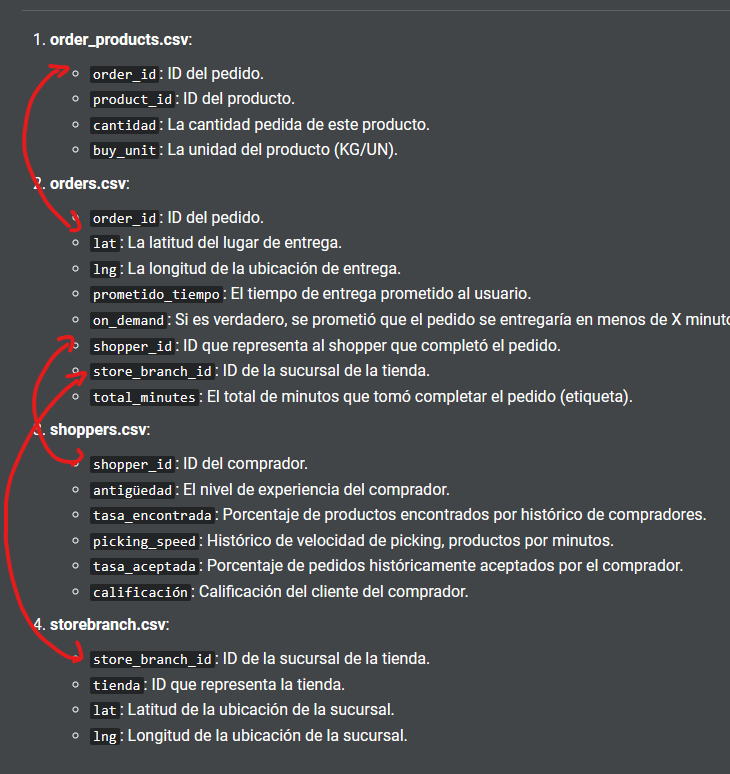

In [ ]:
import pandas as pd

# Suponiendo que ya has leído los archivos CSV como lo hiciste anteriormente

# Combinar DataFrames
merged_df = pd.merge(pedir_productos, pedidos, on='order_id', how='inner')
merged_df = pd.merge(merged_df, comprador, on='shopper_id', how='inner')
merged_df = pd.merge(merged_df, sucursal, on='store_branch_id', how='inner')

pedidos_merged = merged_df

In [ ]:
# Utiliza el método drop_duplicates para eliminar duplicados basados en la columna 'order_id'
pedidos_merged  = pedidos_merged.drop_duplicates(subset='order_id')


In [ ]:
import pandas as pd

# Utiliza nunique para contar la cantidad de valores únicos en 'order_id'
cantidad_de_order_id_unicos = merged_df['order_id'].nunique()

# Ahora cantidad_de_order_id_unicos contendrá el número de 'order_id' únicos en merged_df
print("Cantidad de 'order_id' únicos: ", cantidad_de_order_id_unicos)


Cantidad de 'order_id' únicos:  10000


Con la creación del DataFrame combinado (merged), ahora disponemos de información detallada sobre los pedidos, incluyendo los productos solicitados por cada cliente. Además, las columnas 'lat_x' e 'lng_x' identifican la ubicación de entrega del pedido, mientras que 'lat_y' e 'lng_y' indican la posición geográfica de la sucursal correspondiente.

## Merged para entrenamiento.

In [ ]:
merged_df

,order_id,product_id,quantity,buy_unit,lat_x,lng_x,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_y,lng_y
0,47099653730fb1b76537fc10ad876255,e293e5b987e7d66efe1b0159045b2a9f,2.0,UN,-33.328686,-70.546500,2019-10-19 18:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
1,47099653730fb1b76537fc10ad876255,a992a9e939240ce589accf70240bddda,1.0,KG,-33.328686,-70.546500,2019-10-19 18:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
2,47099653730fb1b76537fc10ad876255,4356faa8abb9842767cee345072e6e1e,3.0,UN,-33.328686,-70.546500,2019-10-19 18:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
3,47099653730fb1b76537fc10ad876255,3a70e31b2fe58baa619ffb1d9b23c8ff,1.0,UN,-33.328686,-70.546500,2019-10-19 18:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
4,47099653730fb1b76537fc10ad876255,bdcc4590896a0d0b419d0388fd16a859,3.0,KG,-33.328686,-70.546500,2019-10-19 18:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198517,2fdfbd2ee65811661cc16b276eb33a8a,9512cb5ba474dfcf45523098bcbde63b,1.0,UN,-33.415790,-70.564812,2019-10-18 19:32:00+00:00,True,7f44d9f9ea23a434358e1ff942693e94,9a49a25d845a483fae4be7e341368e36,44.399626,50e13ee63f086c2fe84229348bc91b5b,NaN,2.19,0.833333,4.78,b534ba68236ba543ae44b22bd110a1d6,-33.379674,-70.538071
198518,c674e74beb680269156b47c3eadc1d56,11c22bc76abc7cde04a8a0c14fdbcc8b,4.0,UN,-33.392778,-70.499071,2019-10-18 23:00:00+00:00,False,816d894e7d59cf1e60a7e8dafa56fff1,85690f81aadc1749175c187784afc9ee,61.651631,41dc7c9e385c4d2b6c1f7836973951bf,0.8250,1.27,0.880000,4.92,8f7d807e1f53eff5f9efbe5cb81090fb,-33.397175,-70.553746
198519,e83d5847d7640f018a08f1dba421c511,73a57c565b90909af644c05b359f6043,1.0,UN,-33.249264,-70.625994,2019-10-18 19:51:00+00:00,True,e9f7fa9e92b51db87fc140c1e7912a54,02b1be0d48924c327124732726097157,NaN,50e13ee63f086c2fe84229348bc91b5b,0.8373,2.00,1.000000,4.80,854d9fca60b4bd07f9bb215d59ef5561,-33.277750,-70.627983
198520,cd4b29e7f720a9dba4c99777c8f87b20,539145030fb3600d26d6a64130310035,1.0,KG,-33.387251,-70.591373,2019-10-18 20:04:00+00:00,True,6aaeb64310c132ed492b46078486c81e,c1e39d912d21c91dce811d6da9929ae8,NaN,50e13ee63f086c2fe84229348bc91b5b,0.8203,2.00,0.760000,4.84,a4a042cf4fd6bfb47701cbc8a1653ada,-33.417807,-70.607806


## Merged para predicción.

In [ ]:
pedidos_merged

,order_id,product_id,quantity,buy_unit,lat_x,lng_x,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_y,lng_y
0,47099653730fb1b76537fc10ad876255,e293e5b987e7d66efe1b0159045b2a9f,2.0,UN,-33.328686,-70.546500,2019-10-19 18:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
33,8cfd0622c38e7406542af3e32f54e32a,f7b5a64031759041ee19cca9185c6f0d,1.0,UN,-33.330664,-70.520715,2019-10-18 21:05:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,63.784925,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
40,944ada1a9505115a1e056d8d95c8b625,c2964caac096f26db222cb325aa267cb,1.0,UN,-33.371973,-70.515337,2019-10-19 20:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,37.019056,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
49,3858595ab2b3ecc3d4e3305bb4a92c95,5a0c828364dbf6dd406139dab7b25398,2.0,UN,-33.351796,-70.542679,2019-10-19 16:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
61,d6ae3d19e8833660244798697663c35a,318ed92ac74d0cdcdc34c580a3944fef,1.0,UN,-33.328108,-70.502914,2019-10-18 22:44:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198517,2fdfbd2ee65811661cc16b276eb33a8a,9512cb5ba474dfcf45523098bcbde63b,1.0,UN,-33.415790,-70.564812,2019-10-18 19:32:00+00:00,True,7f44d9f9ea23a434358e1ff942693e94,9a49a25d845a483fae4be7e341368e36,44.399626,50e13ee63f086c2fe84229348bc91b5b,NaN,2.19,0.833333,4.78,b534ba68236ba543ae44b22bd110a1d6,-33.379674,-70.538071
198518,c674e74beb680269156b47c3eadc1d56,11c22bc76abc7cde04a8a0c14fdbcc8b,4.0,UN,-33.392778,-70.499071,2019-10-18 23:00:00+00:00,False,816d894e7d59cf1e60a7e8dafa56fff1,85690f81aadc1749175c187784afc9ee,61.651631,41dc7c9e385c4d2b6c1f7836973951bf,0.8250,1.27,0.880000,4.92,8f7d807e1f53eff5f9efbe5cb81090fb,-33.397175,-70.553746
198519,e83d5847d7640f018a08f1dba421c511,73a57c565b90909af644c05b359f6043,1.0,UN,-33.249264,-70.625994,2019-10-18 19:51:00+00:00,True,e9f7fa9e92b51db87fc140c1e7912a54,02b1be0d48924c327124732726097157,NaN,50e13ee63f086c2fe84229348bc91b5b,0.8373,2.00,1.000000,4.80,854d9fca60b4bd07f9bb215d59ef5561,-33.277750,-70.627983
198520,cd4b29e7f720a9dba4c99777c8f87b20,539145030fb3600d26d6a64130310035,1.0,KG,-33.387251,-70.591373,2019-10-18 20:04:00+00:00,True,6aaeb64310c132ed492b46078486c81e,c1e39d912d21c91dce811d6da9929ae8,NaN,50e13ee63f086c2fe84229348bc91b5b,0.8203,2.00,0.760000,4.84,a4a042cf4fd6bfb47701cbc8a1653ada,-33.417807,-70.607806


## Variables relevantes para el entrenamiento
A continuación, se presentarán una serie de gráficos que exhiben variables potencialmente relevantes para la predicción de 'total_minutes'. Estos gráficos se centran principalmente en variables categóricas que se encuentran de manera consistente en todo el conjunto de entrenamiento.

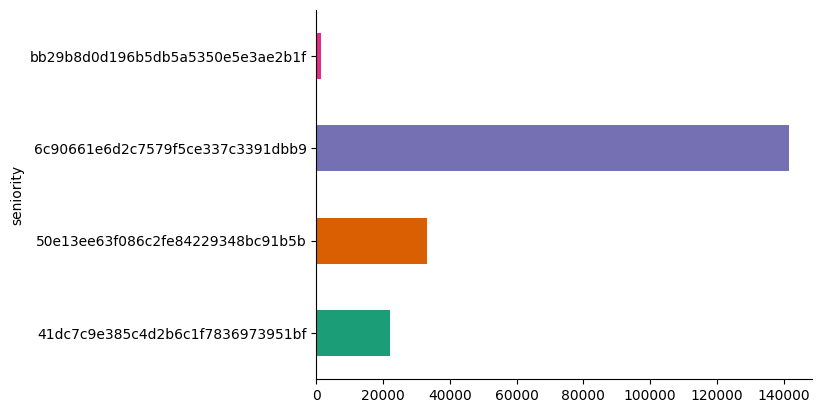

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('seniority').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

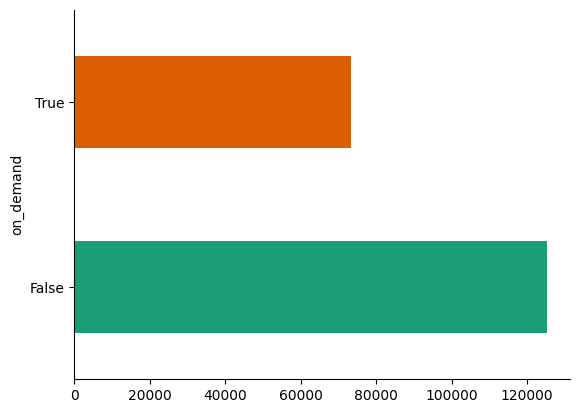

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('on_demand').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

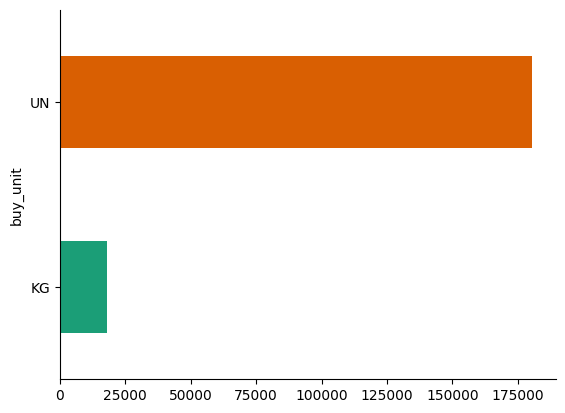

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('buy_unit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

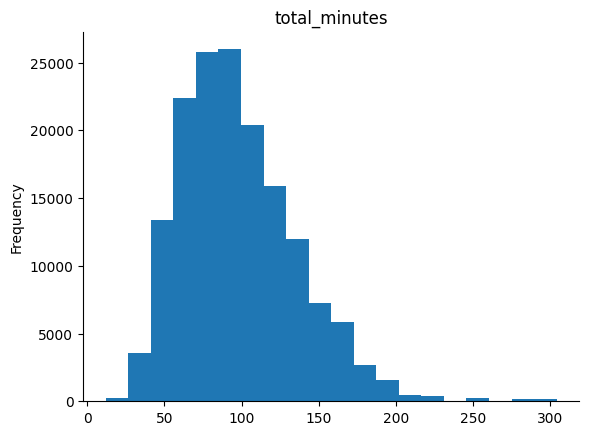

In [ ]:
from matplotlib import pyplot as plt
merged_df['total_minutes'].plot(kind='hist', bins=20, title='total_minutes')
plt.gca().spines[['top', 'right',]].set_visible(False)

------------------------TODO LO DE ARRIBA DEBERIA IR EN EL CODIGO FINAL-------------------------------------------------------------------------------------------

## Valores atípicos de Total_minutes y valores nulos de otras variables

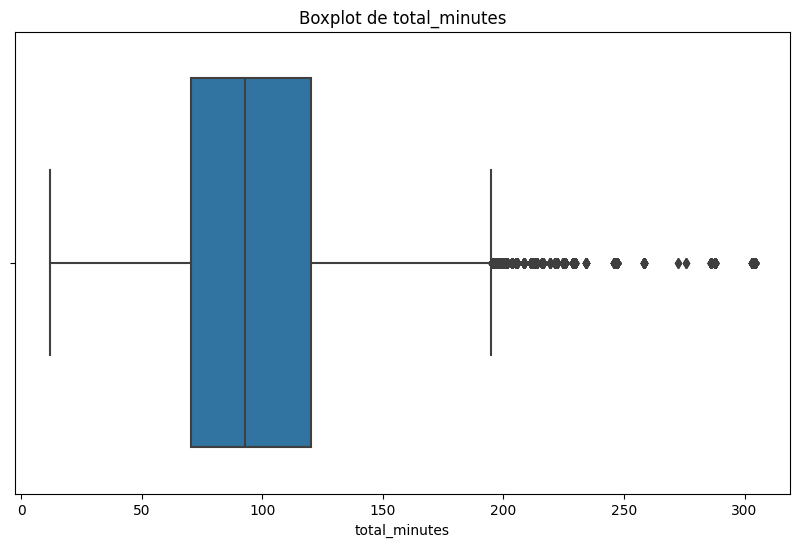

In [ ]:
import seaborn as sns
# Crear el gráfico de bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_minutes', data=merged_df)
plt.title('Boxplot de total_minutes')
plt.show()

In [ ]:
# Crear un bucle for para contar nulos en cada columna
for columna in merged_df.columns:
    nulos_en_columna = merged_df[columna].isnull().sum()
    print(f'Cantidad de valores nulos en {columna}: {nulos_en_columna}')

Cantidad de valores nulos en order_id: 0
Cantidad de valores nulos en product_id: 0
Cantidad de valores nulos en quantity: 0
Cantidad de valores nulos en buy_unit: 0
Cantidad de valores nulos en lat_x: 0
Cantidad de valores nulos en lng_x: 0
Cantidad de valores nulos en promised_time: 0
Cantidad de valores nulos en on_demand: 0
Cantidad de valores nulos en shopper_id: 0
Cantidad de valores nulos en store_branch_id: 0
Cantidad de valores nulos en total_minutes: 40197
Cantidad de valores nulos en seniority: 0
Cantidad de valores nulos en found_rate: 2181
Cantidad de valores nulos en picking_speed: 0
Cantidad de valores nulos en accepted_rate: 602
Cantidad de valores nulos en rating: 2021
Cantidad de valores nulos en store_id: 0
Cantidad de valores nulos en lat_y: 0
Cantidad de valores nulos en lng_y: 0


In [ ]:
# Verificar si existen duplicados en el DataFrame
existen_duplicados = merged_df.duplicated().any()

# Mostrar el resultado
if existen_duplicados:
    print("Existen duplicados en el DataFrame.")
else:
    print("No hay duplicados en el DataFrame.")


Existen duplicados en el DataFrame.


---------------------


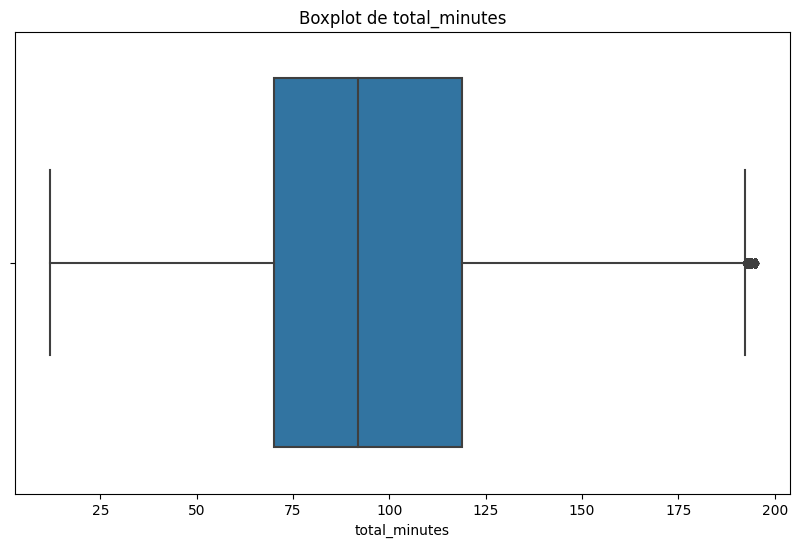

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Almacenar una copia del DataFrame original
merged_df_original = merged_df.copy()

# Identificar y eliminar valores atípicos
Q1 = merged_df['total_minutes'].quantile(0.25)
Q3 = merged_df['total_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores atípicos
merged_df = merged_df[(merged_df['total_minutes'] >= Q1 - 1.5 * IQR) & (merged_df['total_minutes'] <= Q3 + 1.5 * IQR)]

# Crear el gráfico de bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_minutes', data=merged_df)
plt.title('Boxplot de total_minutes')
plt.show()


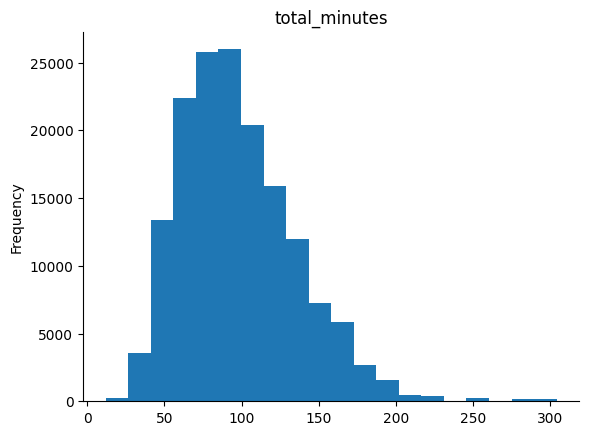

In [ ]:
from matplotlib import pyplot as plt
merged_df_original['total_minutes'].plot(kind='hist', bins=20, title='total_minutes')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Crear un bucle for para contar nulos en cada columna
for columna in merged_df.columns:
    nulos_en_columna = merged_df[columna].isnull().sum()
    print(f'Cantidad de valores nulos en {columna}: {nulos_en_columna}')


Cantidad de valores nulos en order_id: 0
Cantidad de valores nulos en product_id: 0
Cantidad de valores nulos en quantity: 0
Cantidad de valores nulos en buy_unit: 0
Cantidad de valores nulos en lat_x: 0
Cantidad de valores nulos en lng_x: 0
Cantidad de valores nulos en promised_time: 0
Cantidad de valores nulos en on_demand: 0
Cantidad de valores nulos en shopper_id: 0
Cantidad de valores nulos en store_branch_id: 0
Cantidad de valores nulos en total_minutes: 0
Cantidad de valores nulos en seniority: 0
Cantidad de valores nulos en found_rate: 1830
Cantidad de valores nulos en picking_speed: 0
Cantidad de valores nulos en accepted_rate: 507
Cantidad de valores nulos en rating: 1652
Cantidad de valores nulos en store_id: 0
Cantidad de valores nulos en lat_y: 0
Cantidad de valores nulos en lng_y: 0


##
Se utilizara la media de **found_rate**, **accepted_rate**,**rating** respectivamente para rellenar los valores nulos

In [ ]:
pedidos_merged

,order_id,product_id,quantity,buy_unit,lat_x,lng_x,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_y,lng_y
0,47099653730fb1b76537fc10ad876255,e293e5b987e7d66efe1b0159045b2a9f,2.0,UN,-33.328686,-70.546500,2019-10-19 18:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
33,8cfd0622c38e7406542af3e32f54e32a,f7b5a64031759041ee19cca9185c6f0d,1.0,UN,-33.330664,-70.520715,2019-10-18 21:05:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,63.784925,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
40,944ada1a9505115a1e056d8d95c8b625,c2964caac096f26db222cb325aa267cb,1.0,UN,-33.371973,-70.515337,2019-10-19 20:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,37.019056,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
49,3858595ab2b3ecc3d4e3305bb4a92c95,5a0c828364dbf6dd406139dab7b25398,2.0,UN,-33.351796,-70.542679,2019-10-19 16:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
61,d6ae3d19e8833660244798697663c35a,318ed92ac74d0cdcdc34c580a3944fef,1.0,UN,-33.328108,-70.502914,2019-10-18 22:44:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,NaN,41dc7c9e385c4d2b6c1f7836973951bf,0.8483,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198517,2fdfbd2ee65811661cc16b276eb33a8a,9512cb5ba474dfcf45523098bcbde63b,1.0,UN,-33.415790,-70.564812,2019-10-18 19:32:00+00:00,True,7f44d9f9ea23a434358e1ff942693e94,9a49a25d845a483fae4be7e341368e36,44.399626,50e13ee63f086c2fe84229348bc91b5b,NaN,2.19,0.833333,4.78,b534ba68236ba543ae44b22bd110a1d6,-33.379674,-70.538071
198518,c674e74beb680269156b47c3eadc1d56,11c22bc76abc7cde04a8a0c14fdbcc8b,4.0,UN,-33.392778,-70.499071,2019-10-18 23:00:00+00:00,False,816d894e7d59cf1e60a7e8dafa56fff1,85690f81aadc1749175c187784afc9ee,61.651631,41dc7c9e385c4d2b6c1f7836973951bf,0.8250,1.27,0.880000,4.92,8f7d807e1f53eff5f9efbe5cb81090fb,-33.397175,-70.553746
198519,e83d5847d7640f018a08f1dba421c511,73a57c565b90909af644c05b359f6043,1.0,UN,-33.249264,-70.625994,2019-10-18 19:51:00+00:00,True,e9f7fa9e92b51db87fc140c1e7912a54,02b1be0d48924c327124732726097157,NaN,50e13ee63f086c2fe84229348bc91b5b,0.8373,2.00,1.000000,4.80,854d9fca60b4bd07f9bb215d59ef5561,-33.277750,-70.627983
198520,cd4b29e7f720a9dba4c99777c8f87b20,539145030fb3600d26d6a64130310035,1.0,KG,-33.387251,-70.591373,2019-10-18 20:04:00+00:00,True,6aaeb64310c132ed492b46078486c81e,c1e39d912d21c91dce811d6da9929ae8,NaN,50e13ee63f086c2fe84229348bc91b5b,0.8203,2.00,0.760000,4.84,a4a042cf4fd6bfb47701cbc8a1653ada,-33.417807,-70.607806


In [ ]:
# Crear una copia del DataFrame para evitar el SettingWithCopyWarning
merged_df = merged_df.copy()

# Calcular la media de found_rate, accepted_rate y rating
media_found_rate = merged_df['found_rate'].mean()
media_accepted_rate = merged_df['accepted_rate'].mean()
media_rating = merged_df['rating'].mean()

# Rellenar los valores nulos con las medias respectivas
merged_df['found_rate'].fillna(media_found_rate, inplace=True)
merged_df['accepted_rate'].fillna(media_accepted_rate, inplace=True)
merged_df['rating'].fillna(media_rating, inplace=True)


#Lo mismo para el dataframe sin los valores originales
pedidos_merged = pedidos_merged.copy()

# Rellenar los valores nulos con las medias respectivas
pedidos_merged['found_rate'].fillna(media_found_rate, inplace=True)
pedidos_merged['accepted_rate'].fillna(media_accepted_rate, inplace=True)
pedidos_merged['rating'].fillna(media_rating, inplace=True)


In [ ]:
# Crear un bucle for para contar nulos en cada columna
for columna in merged_df.columns:
    nulos_en_columna = merged_df[columna].isnull().sum()
    print(f'Cantidad de valores nulos en {columna}: {nulos_en_columna}')


Cantidad de valores nulos en order_id: 0
Cantidad de valores nulos en product_id: 0
Cantidad de valores nulos en quantity: 0
Cantidad de valores nulos en buy_unit: 0
Cantidad de valores nulos en lat_x: 0
Cantidad de valores nulos en lng_x: 0
Cantidad de valores nulos en promised_time: 0
Cantidad de valores nulos en on_demand: 0
Cantidad de valores nulos en shopper_id: 0
Cantidad de valores nulos en store_branch_id: 0
Cantidad de valores nulos en total_minutes: 0
Cantidad de valores nulos en seniority: 0
Cantidad de valores nulos en found_rate: 0
Cantidad de valores nulos en picking_speed: 0
Cantidad de valores nulos en accepted_rate: 0
Cantidad de valores nulos en rating: 0
Cantidad de valores nulos en store_id: 0
Cantidad de valores nulos en lat_y: 0
Cantidad de valores nulos en lng_y: 0


In [ ]:
# Verificar si existen duplicados en el DataFrame
existen_duplicados = merged_df.duplicated().any()

# Mostrar el resultado
if existen_duplicados:
    print("Existen duplicados en el DataFrame.")
else:
    print("No hay duplicados en el DataFrame.")


Existen duplicados en el DataFrame.


In [ ]:
merged_df

,order_id,product_id,quantity,buy_unit,lat_x,lng_x,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_y,lng_y
33,8cfd0622c38e7406542af3e32f54e32a,f7b5a64031759041ee19cca9185c6f0d,1.0,UN,-33.330664,-70.520715,2019-10-18 21:05:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,63.784925,41dc7c9e385c4d2b6c1f7836973951bf,0.848300,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
34,8cfd0622c38e7406542af3e32f54e32a,177e3603955b7974dba2ede67c2e8d95,2.0,UN,-33.330664,-70.520715,2019-10-18 21:05:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,63.784925,41dc7c9e385c4d2b6c1f7836973951bf,0.848300,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
35,8cfd0622c38e7406542af3e32f54e32a,274ad4786c3abca69fa097b85867d9a4,1.0,UN,-33.330664,-70.520715,2019-10-18 21:05:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,63.784925,41dc7c9e385c4d2b6c1f7836973951bf,0.848300,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
36,8cfd0622c38e7406542af3e32f54e32a,102c7dd45cf0b5b91439705c3a4bc1c5,3.0,UN,-33.330664,-70.520715,2019-10-18 21:05:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,63.784925,41dc7c9e385c4d2b6c1f7836973951bf,0.848300,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
37,8cfd0622c38e7406542af3e32f54e32a,d941f7183f6331a2c7d59cf1333e93c6,1.0,UN,-33.330664,-70.520715,2019-10-18 21:05:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,63.784925,41dc7c9e385c4d2b6c1f7836973951bf,0.848300,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198515,61619dedbf5936abf1054e3ee1522541,8d9b4e071f64d6ca035de4e6437414e8,1.0,UN,-33.528487,-70.575965,2019-10-19 15:07:00+00:00,True,ead96260c08f5732b3bb56c15ea27676,a00e5eb0973d24649a4a920fc53d9564,34.463592,50e13ee63f086c2fe84229348bc91b5b,0.887400,2.06,0.840000,4.94,6da9003b743b65f4c0ccd295cc484e57,-33.509822,-70.608103
198516,61619dedbf5936abf1054e3ee1522541,85203ae86f2de2662ca5b6d614fbe495,1.0,UN,-33.528487,-70.575965,2019-10-19 15:07:00+00:00,True,ead96260c08f5732b3bb56c15ea27676,a00e5eb0973d24649a4a920fc53d9564,34.463592,50e13ee63f086c2fe84229348bc91b5b,0.887400,2.06,0.840000,4.94,6da9003b743b65f4c0ccd295cc484e57,-33.509822,-70.608103
198517,2fdfbd2ee65811661cc16b276eb33a8a,9512cb5ba474dfcf45523098bcbde63b,1.0,UN,-33.415790,-70.564812,2019-10-18 19:32:00+00:00,True,7f44d9f9ea23a434358e1ff942693e94,9a49a25d845a483fae4be7e341368e36,44.399626,50e13ee63f086c2fe84229348bc91b5b,0.865677,2.19,0.833333,4.78,b534ba68236ba543ae44b22bd110a1d6,-33.379674,-70.538071
198518,c674e74beb680269156b47c3eadc1d56,11c22bc76abc7cde04a8a0c14fdbcc8b,4.0,UN,-33.392778,-70.499071,2019-10-18 23:00:00+00:00,False,816d894e7d59cf1e60a7e8dafa56fff1,85690f81aadc1749175c187784afc9ee,61.651631,41dc7c9e385c4d2b6c1f7836973951bf,0.825000,1.27,0.880000,4.92,8f7d807e1f53eff5f9efbe5cb81090fb,-33.397175,-70.553746


---------------------------------de aqui para abajo deberia estar en el colab final------------------------------------------------

## Grafico de correlación de variables.

Al analizar este gráfico, podemos identificar las variables que podrían ser relevantes durante el entrenamiento del modelo, observando sus correlaciones positivas y negativas. En este contexto, destaca que las variables (lat_x e lng_x) y (lat_y e lng_y) presentan una fuerte correlación positiva, lo que indica que a medida que la latitud (lat_x) aumenta, también lo hace la longitud (lng_x), y de manera análoga para las variables (lat_y) y (lng_y).

Por otro lado, variables como 'picking_speed' y 'found_rate' muestran una correlación negativa. Esto sugiere que, a medida que la velocidad de picking aumenta, la tasa de éxito en la búsqueda de productos tiende a disminuir. Esta relación inversa podría deberse a una mayor velocidad de procesamiento que compromete la precisión en la búsqueda. Además, se añade a esta observación el hecho de que 'picking_speed' y 'accepted_rate' también presentan una correlación negativa. Este último hallazgo refuerza la idea de que una mayor velocidad de picking podría asociarse con una disminución en la tasa de aceptación de pedidos, resaltando la importancia de encontrar un equilibrio óptimo entre eficiencia y precisión en el proceso de preparación de pedidos.


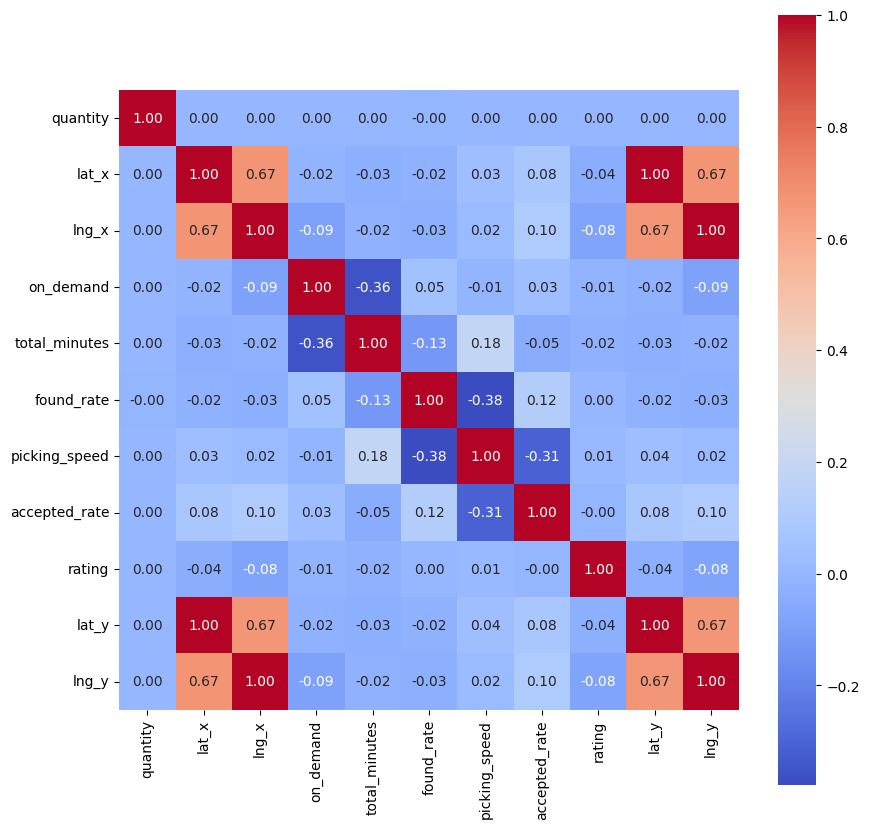

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'df' es tu DataFrame
df = merged_df[['quantity', 'lat_x', 'lng_x', 'on_demand', 'total_minutes', 'found_rate', 'picking_speed', 'accepted_rate', 'rating', 'lat_y', 'lng_y']]

# Calcular la matriz de correlación
corr = df.corr()

# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.show()

# Entrenamiento de modelos

Para el entrenamiento de los modelos, es esencial identificar las variables numéricas y no numéricas, así como determinar cuáles de ellas son potencialmente utilizables. En este proceso, las variables categóricas deben someterse a la transformación mediante One-Hot Encoding. Este paso es crucial para asegurar que el modelo pueda interpretar y utilizar efectivamente las características categóricas en el conjunto de datos.

En el conjunto de datos proporcionado, las variables no numéricas incluyen:

- order_id
- product_id
- buy_unit
- promised_time
- on_demand
- shopper_id
- store_branch_id
- seniority
- store_id

Estas columnas deben considerarse para aplicar one-hot encoding en caso se ser utilizadas para entrenamiento.

Para la predicción de 'total_minutes', algunas variables pueden ser excluidas del conjunto de características (X) en el modelo.

1. **order_id y product_id:** Estas parecen ser identificadores únicos y es probable que no aporten información útil para la predicción.

2. **promised_time:** Si ya estás utilizando 'on_demand' para indicar si se prometió una entrega rápida, la variable 'promised_time' podría no ser necesaria.

3. **store_id:** Dependiendo de cómo se relacione con 'store_branch_id', podrías elegir mantener solo una de estas variables.

4. **on_demand:** Podría ser redundante si estás utilizando la información de otras variables para indicar entregas rápidas.

## Variables Seleccionadas para el Entrenamiento del Modelo de Predicción de Tiempo de Entrega

Las variables seleccionadas para el entrenamiento del modelo incluyen:

- `quantity`: La cantidad de productos en el pedido.
- `buy_unit`: La unidad de compra (KG/UN) de los productos.
- `lat_x` y `lng_x`: Las coordenadas geográficas de la ubicación de entrega.
- `on_demand`: Indicador de si se prometió una entrega rápida.
- `total_minutes`: La variable objetivo, representando el tiempo total que tomó completar el pedido.
- `seniority`: Nivel de experiencia del comprador.
- `found_rate`: Porcentaje de productos encontrados históricamente por los compradores.
- `picking_speed`: Velocidad histórica de picking, es decir, productos por minuto.
- `accepted_rate`: Porcentaje de pedidos históricamente aceptados por el comprador.
- `rating`: Calificación del comprador.
- `lat_y` y `lng_y`: Coordenadas geográficas de la sucursal de la tienda.


## Entrenamiento de los modelos.

A continuación se detallara el cómo se generó el entrenamiento y evaluación de varios modelos de regresión para predecir el tiempo total de entrega de los pedidos.

1. **Preprocesamiento de Datos:**
   - Se eliminan columnas no deseadas de los conjuntos de datos de pedidos y productos.
   - Se aplica codificación one-hot a las columnas 'buy_unit' y 'seniority'.
   - La columna 'on_demand' se convierte en variables binarias (0 y 1).

2. **División de Datos:**
   - El conjunto de datos se divide en características (X) y etiquetas (y).
   - Se dividen los datos en conjuntos de entrenamiento (80%) y prueba (20%).
   - El conjunto de prueba se divide adicionalmente en conjuntos de validación (50%) y prueba (50%).

3. **Definición de Modelos:**
   - Se definen varios modelos de regresión, como Random Forest, KNN, Gradient Boosting, entre otros.

4. **Entrenamiento de Modelos:**
   - Cada modelo se entrena utilizando el conjunto de entrenamiento.
   - Se realizan predicciones en los conjuntos de prueba y validación.
   - Se calculan métricas de rendimiento como RMSE, R², MAE y MSE.

5. **Selección del Mejor Modelo:**
   - Se identifica el modelo con el RMSE más bajo en el conjunto de validación.
   - El modelo seleccionado se utiliza para predecir los valores faltantes ('total_minutes') en el conjunto de pedidos.

6. **Visualización de Resultados:**
   - Se muestran gráficos que comparan las métricas de rendimiento de los diferentes modelos.

7. **Impresión de Resultados:**
   - Se imprime un resumen de las métricas de rendimiento en el conjunto de prueba.
   - Se indica cuál es el mejor modelo seleccionado.

8. **Predicciones en el Conjunto de Pedidos:**
   - Se aplican las predicciones del mejor modelo a los valores faltantes de 'total_minutes' en el conjunto de pedidos.


Index(['quantity', 'buy_unit', 'lat_x', 'lng_x', 'on_demand', 'total_minutes',
       'seniority', 'found_rate', 'picking_speed', 'accepted_rate', 'rating',
       'lat_y', 'lng_y'],
      dtype='object')
-.-.-.-Random Forest-.-.-.-
Test: RMSE = 2.509688495970863, R² = 0.9945959685847718, MAE = 0.5324457565513917, MSE = 6.298536346808493
Validation: RMSE = 2.6269781437817943, R² = 0.9942397995540265, MAE = 0.5177257401088554, MSE = 6.901014167907242
-.-.-.-KNN-.-.-.-
Test: RMSE = 15.450220125304767, R² = 0.7951916928543986, MAE = 5.482799574316656, MSE = 238.70930192037244
Validation: RMSE = 15.27043807431921, R² = 0.8053619836876621, MAE = 5.406085682228813, MSE = 233.1862789816178
-.-.-.-Gradient Boosting-.-.-.-
Test: RMSE = 12.786076393202599, R² = 0.859733869948646, MAE = 10.358701876980088, MSE = 163.48374953281277
Validation: RMSE = 13.02126177928967, R² = 0.8584757645100034, MAE = 10.511566954019756, MSE = 169.55325832479
-.-.-.-Linear SVC-.-.-.-
Test: RMSE = 31.38552020168701, 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:32:14] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


-.-.-.-XGBoost-.-.-.-
Test: RMSE = 13.383252980707393, R² = 0.8463255738731191, MAE = 10.738074043811817, MSE = 179.11146034561332
Validation: RMSE = 13.571266679156613, R² = 0.8462675860654059, MAE = 10.855887450125843, MSE = 184.17927927678656
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1649
[LightGBM] [Info] Number of data points in the train set: 124998, number of used features: 16
[LightGBM] [Info] Start training from score 96.351160
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning]

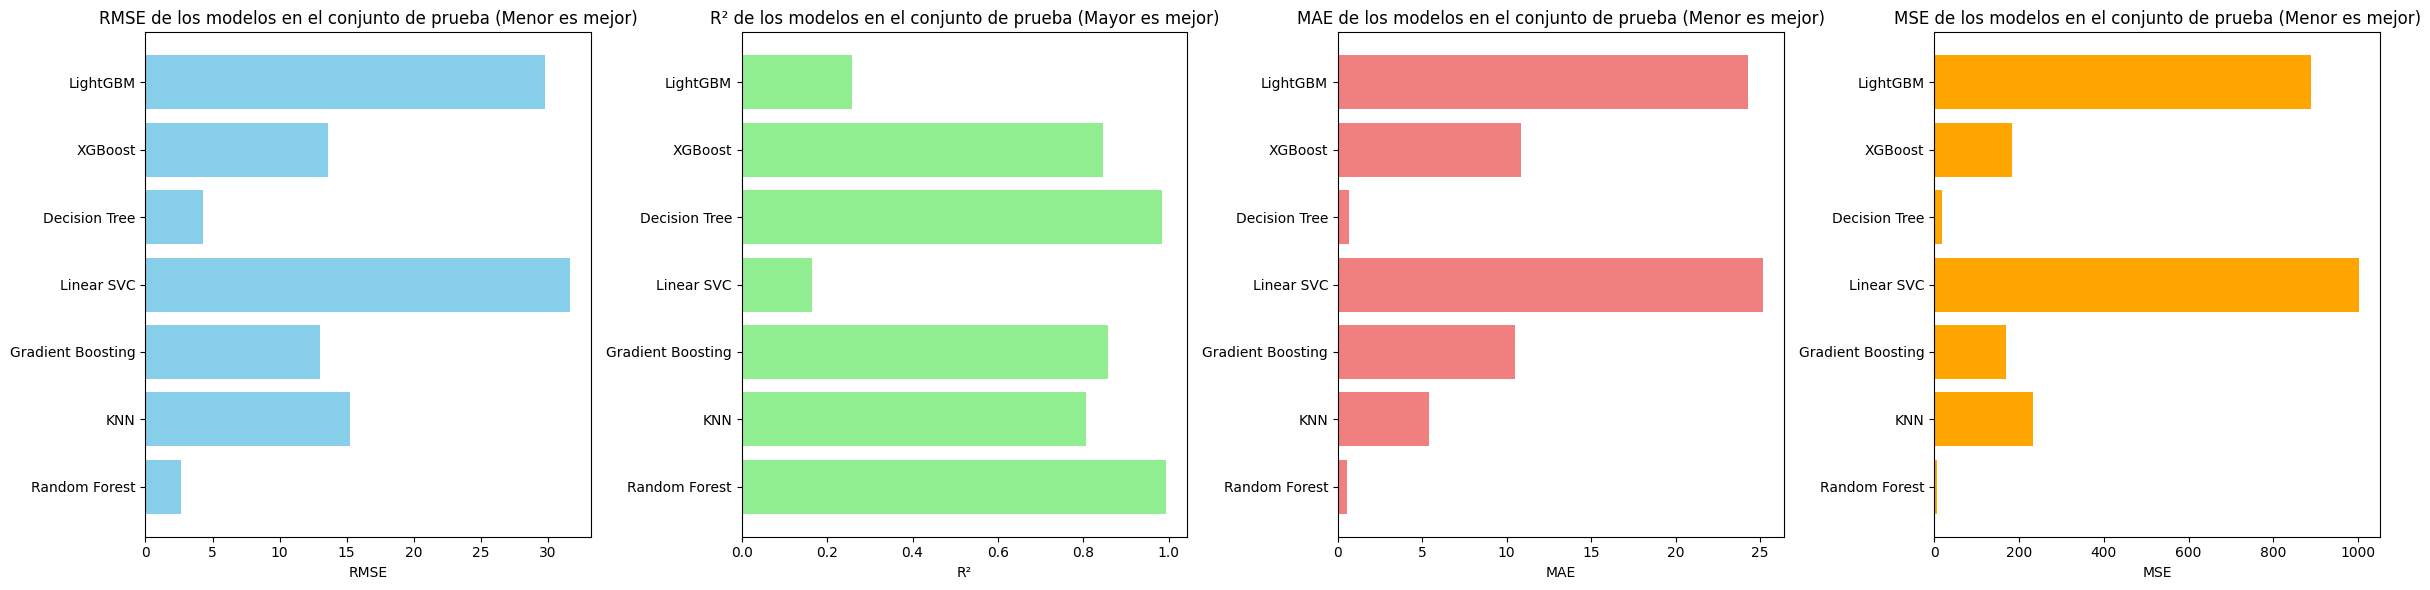


Resultados de las métricas en el conjunto de prueba:
               Model  RMSE (Validation)  R² (Validation)  MAE (Validation)  \
0      Random Forest           2.626978         0.994240          0.517726   
1                KNN          15.270438         0.805362          5.406086   
2  Gradient Boosting          13.021262         0.858476         10.511567   
3         Linear SVC          31.641071         0.164345         25.154536   
4      Decision Tree           4.265183         0.984816          0.639029   
5            XGBoost          13.571267         0.846268         10.855887   
6           LightGBM          29.810198         0.258255         24.296502   

   MSE (Validation)  
0          6.901014  
1        233.186279  
2        169.553258  
3       1001.157345  
4         18.191783  
5        184.179279  
6        888.647922  

Se está utilizando el mejor modelo (RandomForestRegressor(max_depth=25, n_estimators=200, n_jobs=-1,
                      random_state=42)) par

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

def test_models(df, pedidos):
    # Eliminar columnas no deseadas antes de aplicar get_dummies
    pedidos = pedidos.drop(['order_id', 'product_id', 'promised_time', 'store_id', 'shopper_id','store_branch_id'], axis=1)
    df_cleaned = df.drop(['order_id', 'product_id', 'promised_time', 'store_id', 'shopper_id','store_branch_id'], axis=1)
    print(pedidos.columns)
    # Aplicar one-hot encoding a las columnas especificadas
    df_encoded = pd.get_dummies(df_cleaned, columns=['buy_unit', 'seniority'])

    # Convertir la columna 'on_demand' a 0 y 1
    df_encoded['on_demand'] = df_encoded['on_demand'].astype(int)

    # Dividir el DataFrame en características (X) y etiquetas (y)
    X = df_encoded.drop(['total_minutes'], axis=1)
    y = df_encoded['total_minutes']

    # Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

    # Dividir el conjunto temporal en conjuntos de validación (50%) y prueba (50%)
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Definir modelos y sus hiperparámetros
    models = [
      ('Random Forest', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, max_depth=25)),
      ('KNN', KNeighborsRegressor(n_neighbors=5, weights='distance', n_jobs=-1)),
      ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=25, random_state=42)),
      ('Linear SVC', LinearSVR(epsilon=0.01, C=0.5, max_iter=15000)),
      ('Decision Tree', DecisionTreeRegressor(max_depth=25)),
      ('XGBoost', XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=25, tree_method='hist', device='gpu')),
      ('LightGBM', LGBMRegressor(n_estimators=100, learning_rate=0.01, max_depth=25, device='cpu'))
    ]

    model_names = []
    model_rmse_train = []
    model_r2_train = []
    model_mae_train = []
    model_mse_train = []
    model_rmse_valid = []
    model_r2_valid = []
    model_mae_valid = []
    model_mse_valid = []
    models_trained = []

    # Iterar sobre los modelos
    for model_name, model in models:
        # Entrenar el modelo en el conjunto de entrenamiento
        model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de test
        y_test_pred = model.predict(X_test)

        # Realizar predicciones en el conjunto de validación
        y_valid_pred = model.predict(X_valid)

        # Calcular métricas en el conjunto de entrenamiento
        rmse_train = sqrt(mean_squared_error(y_test, y_test_pred))
        r2_train = r2_score(y_test, y_test_pred)
        mae_train = mean_absolute_error(y_test, y_test_pred)
        mse_train = mean_squared_error(y_test, y_test_pred)

        # Calcular métricas en el conjunto de validación
        rmse_valid = sqrt(mean_squared_error(y_valid, y_valid_pred))
        r2_valid = r2_score(y_valid, y_valid_pred)
        mae_valid = mean_absolute_error(y_valid, y_valid_pred)
        mse_valid = mean_squared_error(y_valid, y_valid_pred)

        # Almacenar el nombre del modelo y las métricas en las listas
        model_names.append(model_name)
        model_rmse_train.append(rmse_train)
        model_r2_train.append(r2_train)
        model_mae_train.append(mae_train)
        model_mse_train.append(mse_train)
        model_rmse_valid.append(rmse_valid)
        model_r2_valid.append(r2_valid)
        model_mae_valid.append(mae_valid)
        model_mse_valid.append(mse_valid)
        models_trained.append(model)

        # Imprimir resultados
        print(f'-.-.-.-{model_name}-.-.-.-')
        print(f'Test: RMSE = {rmse_train}, R² = {r2_train}, MAE = {mae_train}, MSE = {mse_train}')
        print(f'Validation: RMSE = {rmse_valid}, R² = {r2_valid}, MAE = {mae_valid}, MSE = {mse_valid}')

    # Identificar el modelo con el RMSE más bajo en el conjunto de validación
    best_model_index = np.argmin(model_rmse_valid)
    best_model = models_trained[best_model_index]

    # Preparar el DataFrame 'pedidos' para la predicción
    pedidos_encoded = pd.get_dummies(pedidos, columns=['buy_unit', 'seniority'])
    pedidos_encoded['on_demand'] = pedidos_encoded['on_demand'].astype(int)
    X_pedidos = pedidos_encoded.drop(['total_minutes'], axis=1)

    # Predecir los valores NaN en 'total_minutes' en 'pedidos' con el mejor modelo
    y_pedidos_predict = best_model.predict(X_pedidos)

    # Asignar las predicciones a la columna 'total_minutes' en el DataFrame 'pedidos'
    pedidos['total_minutes'] = y_pedidos_predict

    # Imprimir el mensaje indicando el mejor modelo
    print(f"\nEl mejor modelo es: {best_model}")

    # Crear subgráficos para las tres métricas en el conjunto de prueba
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))

    # Gráfico para RMSE en el conjunto de prueba
    axes[0].barh(model_names, model_rmse_valid, color='skyblue')
    axes[0].set_xlabel('RMSE')
    axes[0].set_title('RMSE de los modelos en el conjunto de prueba (Menor es mejor)')

    # Gráfico para R² en el conjunto de prueba
    axes[1].barh(model_names, model_r2_valid, color='lightgreen')
    axes[1].set_xlabel('R²')
    axes[1].set_title('R² de los modelos en el conjunto de prueba (Mayor es mejor)')

    # Gráfico para MAE en el conjunto de prueba
    axes[2].barh(model_names, model_mae_valid, color='lightcoral')
    axes[2].set_xlabel('MAE')
    axes[2].set_title('MAE de los modelos en el conjunto de prueba (Menor es mejor)')

    # Gráfico para MSE en el conjunto de prueba
    axes[3].barh(model_names, model_mse_valid, color='orange')
    axes[3].set_xlabel('MSE')
    axes[3].set_title('MSE de los modelos en el conjunto de prueba (Menor es mejor)')

    # Ajustar el diseño y mostrar la imagen
    plt.tight_layout()
    plt.show()

    # Crear un DataFrame con los resultados de cada métrica en el conjunto de prueba
    results_df_valid = pd.DataFrame({
        'Model': model_names,
        'RMSE (Validation)': model_rmse_valid,
        'R² (Validation)': model_r2_valid,
        'MAE (Validation)': model_mae_valid,
        'MSE (Validation)': model_mse_valid
    })


    # Mostrar el DataFrame de resultados en el conjunto de prueba
    print("\nResultados de las métricas en el conjunto de prueba:")
    print(results_df_valid)

    # Mostrar el mensaje indicando que se está utilizando el mejor modelo para la predicción
    print(f"\nSe está utilizando el mejor modelo ({best_model}) para la predicción de 'total_minutes'.")

    # Devolver el DataFrame 'pedidos' con los valores NaN en 'total_minutes' reemplazados por las predicciones
    return pedidos

# Llamar a la función con tu DataFrame
pedidos_with_predictions = test_models(merged_df, pedidos_merged)


-----------------------------------------------------------------------
### Resultados del entrenamiento
Después de analizar los resultados, Se selecciono y utilizo el modelo de Random Forest para generar las predicciones, A continuación, se presentan las métricas de rendimiento asociadas a este modelo:


| **Métricas del Modelo Random Forest** | **Conjunto de Prueba** | **Conjunto de Validación** |
|---------------------------------------|------------------------|-----------------------------|
| Modelo Seleccionado                   | Random Forest          | Random Forest               |
| RMSE                                  | 2.5097                 | 2.6270                      |
| R²                                    | 0.9946                 | 0.9942                      |
| MAE                                   | 0.5324                 | 0.5177                      |
| MSE                                   | 6.2985                 | 6.9010                      |


Estas cifras destacan la efectividad del modelo Random Forest en predecir el tiempo total de entrega, respaldando su elección como el mejor entre los modelos evaluados.

## Generación del archivo orders.csv con las predicciones realizadas.

El archivo con las predicciones se generó mediante el siguiente procedimiento:

1. **Asignación de Predicciones:**
   Se asignaron las predicciones del mejor modelo (Random Forest) al DataFrame `pedidos_merged`. Esto se realizó mediante la siguiente instrucción:
   ```python
   pedidos_merged['total_minutes'] = pedidos_with_predictions['total_minutes']
   ```
   Esta acción remplazó los valores NaN en la columna 'total_minutes' con las predicciones del modelo.

2. **Eliminación de Columnas No Relevantes:**
   Se eliminaron algunas columnas que no eran relevantes para el análisis y visualización, simplificando así el conjunto de datos:
   ```python
   pedidos_merged = pedidos_merged.drop(['product_id','quantity','buy_unit', 'seniority','found_rate','picking_speed','accepted_rate','rating','store_id','lat_y','lng_y'], axis=1)
   ```

3. **Renombrado de Columnas:**
   Se renombraron las columnas 'lat_x' y 'lng_x' a 'lat' y 'lng', respectivamente:
   ```python
   pedidos_merged = pedidos_merged.rename(columns={'lat_x': 'lat', 'lng_x': 'lng'})
   ```

4. **Exportación a Archivo CSV:**
   Se exportó el DataFrame resultante (`pedidos_merged`) a un archivo CSV llamado 'orders.csv':
   ```python
   pedidos_merged.to_csv('orders.csv', index=False)
   ```
   Este archivo contiene ahora las predicciones del modelo, así como la información relevante para cada pedido.

Además de esto, se generaron algunos procedimientos para verificar que los datos sean congruentes con los datos anteriores.

5. **Verificación de Coincidencia de 'order_id':**
   Se verificó si todos los valores únicos de 'order_id' coincidían entre los DataFrames `pedidos_merged` y `pedidos`.

6. **Búsqueda Interactiva por 'order_id':**
   Se genero un formulario que permite buscar información específica utilizando el valor de 'order_id'. Este formulario está diseñado para mostrar tanto el resultado de la búsqueda en `pedidos_merged` como en `pedidos`.

In [ ]:
pedidos_merged['total_minutes'] = pedidos_with_predictions['total_minutes']

In [ ]:
pedidos_merged

,order_id,product_id,quantity,buy_unit,lat_x,lng_x,promised_time,on_demand,shopper_id,store_branch_id,total_minutes,seniority,found_rate,picking_speed,accepted_rate,rating,store_id,lat_y,lng_y
0,47099653730fb1b76537fc10ad876255,e293e5b987e7d66efe1b0159045b2a9f,2.0,UN,-33.328686,-70.546500,2019-10-19 18:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,70.784055,41dc7c9e385c4d2b6c1f7836973951bf,0.848300,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
33,8cfd0622c38e7406542af3e32f54e32a,f7b5a64031759041ee19cca9185c6f0d,1.0,UN,-33.330664,-70.520715,2019-10-18 21:05:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,63.714561,41dc7c9e385c4d2b6c1f7836973951bf,0.848300,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
40,944ada1a9505115a1e056d8d95c8b625,c2964caac096f26db222cb325aa267cb,1.0,UN,-33.371973,-70.515337,2019-10-19 20:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,37.019056,41dc7c9e385c4d2b6c1f7836973951bf,0.848300,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
49,3858595ab2b3ecc3d4e3305bb4a92c95,5a0c828364dbf6dd406139dab7b25398,2.0,UN,-33.351796,-70.542679,2019-10-19 16:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,75.177551,41dc7c9e385c4d2b6c1f7836973951bf,0.848300,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
61,d6ae3d19e8833660244798697663c35a,318ed92ac74d0cdcdc34c580a3944fef,1.0,UN,-33.328108,-70.502914,2019-10-18 22:44:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,61.926039,41dc7c9e385c4d2b6c1f7836973951bf,0.848300,2.80,1.000000,4.80,c4ca4238a0b923820dcc509a6f75849b,-33.370765,-70.512420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198517,2fdfbd2ee65811661cc16b276eb33a8a,9512cb5ba474dfcf45523098bcbde63b,1.0,UN,-33.415790,-70.564812,2019-10-18 19:32:00+00:00,True,7f44d9f9ea23a434358e1ff942693e94,9a49a25d845a483fae4be7e341368e36,57.807391,50e13ee63f086c2fe84229348bc91b5b,0.865677,2.19,0.833333,4.78,b534ba68236ba543ae44b22bd110a1d6,-33.379674,-70.538071
198518,c674e74beb680269156b47c3eadc1d56,11c22bc76abc7cde04a8a0c14fdbcc8b,4.0,UN,-33.392778,-70.499071,2019-10-18 23:00:00+00:00,False,816d894e7d59cf1e60a7e8dafa56fff1,85690f81aadc1749175c187784afc9ee,71.600489,41dc7c9e385c4d2b6c1f7836973951bf,0.825000,1.27,0.880000,4.92,8f7d807e1f53eff5f9efbe5cb81090fb,-33.397175,-70.553746
198519,e83d5847d7640f018a08f1dba421c511,73a57c565b90909af644c05b359f6043,1.0,UN,-33.249264,-70.625994,2019-10-18 19:51:00+00:00,True,e9f7fa9e92b51db87fc140c1e7912a54,02b1be0d48924c327124732726097157,61.863607,50e13ee63f086c2fe84229348bc91b5b,0.837300,2.00,1.000000,4.80,854d9fca60b4bd07f9bb215d59ef5561,-33.277750,-70.627983
198520,cd4b29e7f720a9dba4c99777c8f87b20,539145030fb3600d26d6a64130310035,1.0,KG,-33.387251,-70.591373,2019-10-18 20:04:00+00:00,True,6aaeb64310c132ed492b46078486c81e,c1e39d912d21c91dce811d6da9929ae8,63.956136,50e13ee63f086c2fe84229348bc91b5b,0.820300,2.00,0.760000,4.84,a4a042cf4fd6bfb47701cbc8a1653ada,-33.417807,-70.607806


In [ ]:
pedidos_merged = pedidos_merged.drop(['product_id','quantity','buy_unit', 'seniority','found_rate','picking_speed','accepted_rate','rating','store_id','lat_y','lng_y'], axis=1)

In [ ]:
# Renombrar columnas lat_x y lng_x a lat y lng
pedidos_merged = pedidos_merged.rename(columns={'lat_x': 'lat', 'lng_x': 'lng'})

In [ ]:
pedidos_merged

,order_id,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes
0,47099653730fb1b76537fc10ad876255,-33.328686,-70.546500,2019-10-19 18:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,70.784055
33,8cfd0622c38e7406542af3e32f54e32a,-33.330664,-70.520715,2019-10-18 21:05:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,63.714561
40,944ada1a9505115a1e056d8d95c8b625,-33.371973,-70.515337,2019-10-19 20:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,37.019056
49,3858595ab2b3ecc3d4e3305bb4a92c95,-33.351796,-70.542679,2019-10-19 16:00:00+00:00,False,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,75.177551
61,d6ae3d19e8833660244798697663c35a,-33.328108,-70.502914,2019-10-18 22:44:00+00:00,True,a0a9a76687e9b6865c4cacb3d568819a,1679091c5a880faf6fb5e6087eb1b2dc,61.926039
...,...,...,...,...,...,...,...,...
198517,2fdfbd2ee65811661cc16b276eb33a8a,-33.415790,-70.564812,2019-10-18 19:32:00+00:00,True,7f44d9f9ea23a434358e1ff942693e94,9a49a25d845a483fae4be7e341368e36,57.807391
198518,c674e74beb680269156b47c3eadc1d56,-33.392778,-70.499071,2019-10-18 23:00:00+00:00,False,816d894e7d59cf1e60a7e8dafa56fff1,85690f81aadc1749175c187784afc9ee,71.600489
198519,e83d5847d7640f018a08f1dba421c511,-33.249264,-70.625994,2019-10-18 19:51:00+00:00,True,e9f7fa9e92b51db87fc140c1e7912a54,02b1be0d48924c327124732726097157,61.863607
198520,cd4b29e7f720a9dba4c99777c8f87b20,-33.387251,-70.591373,2019-10-18 20:04:00+00:00,True,6aaeb64310c132ed492b46078486c81e,c1e39d912d21c91dce811d6da9929ae8,63.956136


In [ ]:
pedidos

,order_id,lat,lng,promised_time,on_demand,shopper_id,store_branch_id,total_minutes
0,e750294655c2c7c34d83cc3181c09de4,-33.501675,-70.579369,2019-10-18 20:48:00+00:00,True,e63bc83a1a952fa2b3cc9d558fb943cf,65ded5353c5ee48d0b7d48c591b8f430,67.684264
1,6581174846221cb6c467348e87f57641,-33.440584,-70.556283,2019-10-19 01:00:00+00:00,False,195f9e9d84a4ba9033c4b6a756334d8b,45fbc6d3e05ebd93369ce542e8f2322d,57.060632
2,3a226ea48debc0a7ae9950d5540f2f34,-32.987022,-71.544842,2019-10-19 14:54:00+00:00,True,a5b9ddc0d82e61582fca19ad43dbaacb,07563a3fe3bbe7e3ba84431ad9d055af,NaN
3,7d2ed03fe4966083e74b12694b1669d8,-33.328075,-70.512659,2019-10-18 21:47:00+00:00,True,d0b3f6bf7e249e5ebb8d3129341773a2,f1748d6b0fd9d439f71450117eba2725,52.067742
4,b4b2682d77118155fe4716300ccf7f39,-33.403239,-70.564020,2019-10-19 20:00:00+00:00,False,5c5199ce02f7b77caa9c2590a39ad27d,1f0e3dad99908345f7439f8ffabdffc4,140.724822
...,...,...,...,...,...,...,...,...
9995,c63cfa783ff6ea9a5577ff0b513e4297,-33.417677,-70.508377,2019-10-19 01:00:00+00:00,False,9cf7b3c6a05745b24eb07e0945ff1718,c4ca4238a0b923820dcc509a6f75849b,116.631287
9996,0b91a6dc570736f490ade9b129bbd46f,-33.432885,-70.646795,2019-10-19 19:00:00+00:00,False,6fd0c09e971aff77c73afb87863da1c6,3871bd64012152bfb53fdf04b401193f,94.094497
9997,229d80f473668d9b25d60ea4d05687dd,-33.424562,-70.582943,2019-10-19 01:00:00+00:00,False,3ed51e3e0e8c9ca2fec3f84766cabe96,1f0e3dad99908345f7439f8ffabdffc4,53.784000
9998,96e2a7a69e52eaa5ce563b1164f72c8d,-33.413806,-70.598500,2019-10-19 18:00:00+00:00,False,cea50f5aa525cfe6d2f445fec7c8ef31,1f0e3dad99908345f7439f8ffabdffc4,52.806311


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Crear un widget de texto para ingresar la order_id
order_id_widget = widgets.Text(
    value='',
    placeholder='Ingrese la order_id',
    description='Order ID:',
    disabled=False
)

# Función para manejar la búsqueda
def buscar_por_order_id(b):
    # Obtener el valor ingresado por el usuario
    order_id_a_buscar = order_id_widget.value

    # Buscar en pedidos_merged
    fila_en_pedidos_merged = pedidos_merged.loc[pedidos_merged['order_id'] == order_id_a_buscar]

    # Buscar en pedidos
    fila_en_pedidos = pedidos.loc[pedidos['order_id'] == order_id_a_buscar]

    # Imprimir los resultados
    print("Resultado de la búsqueda en pedidos_merged:")
    print(float(fila_en_pedidos_merged['total_minutes']))

    print("\nResultado de la búsqueda en pedidos:")
    print(float(fila_en_pedidos['total_minutes']))

# Crear un botón para realizar la búsqueda
boton_buscar = widgets.Button(description="Buscar")
boton_buscar.on_click(buscar_por_order_id)

# Mostrar el formulario
display(order_id_widget, boton_buscar)


Text(value='', description='Order ID:', placeholder='Ingrese la order_id')

Button(description='Buscar', style=ButtonStyle())

Resultado de la búsqueda en pedidos_merged:
79.5436811572883

Resultado de la búsqueda en pedidos:
nan


In [ ]:
# Verificar si todos los valores únicos de order_id coinciden entre pedidos_merged y pedidos
order_id_match = pedidos_merged['order_id'].isin(pedidos['order_id']).all()

# Imprimir el resultado
if order_id_match:
    print("Todos los valores únicos de order_id coinciden entre pedidos_merged y pedidos.")
else:
    print("No todos los valores únicos de order_id coinciden entre pedidos_merged y pedidos.")


Todos los valores únicos de order_id coinciden entre pedidos_merged y pedidos.


In [ ]:
# Devolver el DataFrame 'pedidos' con los valores NaN en 'total_minutes' reemplazados por las predicciones
pedidos_merged.to_csv('orders.csv', index=False)


--------------------------------------
